# Support Vector Machines
COMP9417 Major Assignment  
Purpose: Investigate SVMs as a model for the Student Life Dataset  
Author: Andrew Lau

In [69]:
import os
os.getcwd()

'C:\\Users\\andre\\Documents\\GitHub\\COMP9417_major_project'

In [70]:
# globals
CV_FOLDS = 10
N_JOBS = 1

In [71]:
# import modules
import pandas as pd
import numpy as np

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

import sklearn 
print (sklearn.__version__)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, GridSearchCV

import warnings
warnings.simplefilter(action='once', category=FutureWarning)

import helper_functions as helper  # importing custom helper functions
import shap

0.20.1


In [72]:
# import data
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        
X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

In [73]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u03,30.0,27.0,34.0,30.0,27.0,34.0,1.0,1.0,0.0,1.0,...,31.0,25.0,20.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u27,23.0,18.0,31.0,23.0,18.0,31.0,0.0,0.0,0.0,0.0,...,31.0,19.0,23.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u05,32.0,27.0,48.0,32.0,27.0,48.0,1.0,1.0,1.0,1.0,...,50.0,33.0,17.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0
u43,31.0,18.0,47.0,31.0,18.0,47.0,1.0,0.0,1.0,1.0,...,42.0,32.0,21.0,42.0,1.0,1.0,0.0,1.0,1.0,0.0
u56,22.0,9.0,46.0,22.0,9.0,46.0,0.0,0.0,1.0,0.0,...,48.0,29.0,15.0,48.0,1.0,0.0,1.0,1.0,0.0,1.0


# EDA

In [74]:
y_train.describe()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
count,36.000000,34.000000,33.000000,37.000000,37.000000,37.000000,36.000000,34.000000,33.000000,37.000000,...,28.000000,30.000000,30.000000,28.000000,29.000000,30.000000,28.000000,30.000000,30.000000,28.000000
mean,28.500000,19.382353,42.636364,28.513514,19.810811,42.972973,0.527778,0.441176,0.545455,0.540541,...,43.178571,29.600000,21.766667,43.178571,0.517241,0.566667,0.500000,0.533333,0.566667,0.500000
std,6.235841,7.781153,9.266263,6.149172,7.978575,9.114965,0.506309,0.503995,0.505650,0.505228,...,9.412575,6.881259,8.067317,9.412575,0.508548,0.504007,0.509175,0.507416,0.504007,0.509175
min,13.000000,10.000000,15.000000,13.000000,10.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,17.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,14.000000,41.000000,26.000000,14.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.500000,25.250000,15.000000,40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,17.500000,45.000000,29.000000,18.000000,45.000000,1.000000,0.000000,1.000000,1.000000,...,44.500000,31.000000,20.000000,44.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000
75%,32.250000,21.750000,49.000000,32.000000,25.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,48.250000,34.000000,27.500000,48.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,43.000000,54.000000,42.000000,43.000000,56.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,43.000000,37.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
y_train.columns

Index(['panas_pos_raw_pre', 'panas_neg_raw_pre', 'flourishing_scale_raw_pre',
       'panas_pos_imp_pre', 'panas_neg_imp_pre', 'flourishing_scale_imp_pre',
       'panas_pos_raw_class_pre', 'panas_neg_raw_class_pre',
       'flourishing_scale_raw_class_pre', 'panas_pos_imp_class_pre',
       'panas_neg_imp_class_pre', 'flourishing_scale_imp_class_pre',
       'panas_pos_raw_post', 'panas_neg_raw_post',
       'flourishing_scale_raw_post', 'panas_pos_imp_post',
       'panas_neg_imp_post', 'flourishing_scale_imp_post',
       'panas_pos_raw_class_post', 'panas_neg_raw_class_post',
       'flourishing_scale_raw_class_post', 'panas_pos_imp_class_post',
       'panas_neg_imp_class_post', 'flourishing_scale_imp_class_post'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9756DAF28>]],
      dtype=object)

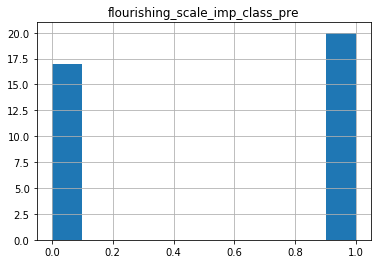

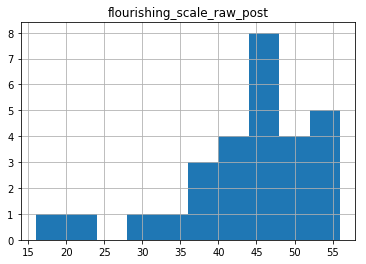

In [76]:
y_train.loc[:, ['flourishing_scale_imp_class_pre']].hist()
y_train.loc[:, ['flourishing_scale_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A977948C18>]],
      dtype=object)

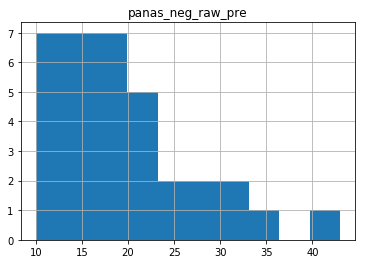

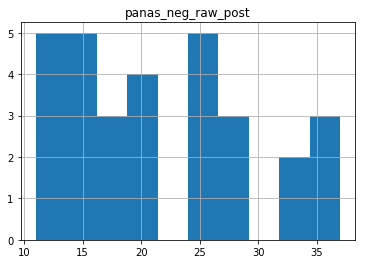

In [77]:
y_train.loc[:, ['panas_neg_raw_pre']].hist()
y_train.loc[:, ['panas_neg_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A977A2FA90>]],
      dtype=object)

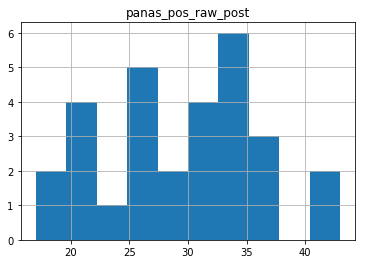

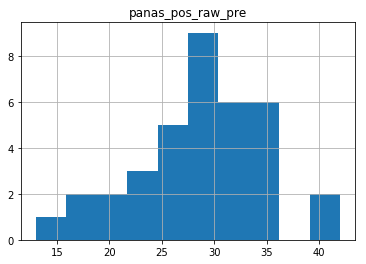

In [78]:
y_train.loc[:, ['panas_pos_raw_post']].hist()
y_train.loc[:, ['panas_pos_raw_pre']].hist()

In [79]:
features_wk_10 = [
    "chargetime_count_wk_10"
    , "chargetime_max_wk_10"
    , "chargetime_mean_wk_10"
    , "chargetime_median_wk_10"
    , "chargetime_min_wk_10"
    , "chargetime_q1_wk_10"
    , "chargetime_q3_wk_10"
    , "activity_stationary_ratio_wk_10"
    , "activity_running_ratio_wk_10"
    , "audio_silent_ratio_wk_10"
    , "audio_noisy_ratio_wk_10"
    , "bluetooth_avg_wk_10"
    , "conversation_hours_wk_10"
    , "conversation_freq_wk_10"
    , "speed_mean_wk_10"
    , "speed_max_wk_10"
    , "speed_sd_wk_10"
    , "travelstate_time_stationary_wk_10"
    , "travelstate_time_moving_wk_10"
    , "outdoor_time_wk_10"
    , "indoor_time_wk_10"
    , "indoor_dist_wk_10"
    , "outdoors_dist_wk_10"
    , "altitude_mean_wk_10"
    , "altitude_sd_wk_10"
    , "altitude_max_wk_10"
    , "altitude_min_wk_10"
    , "location_count_wk_10"
    , "location_1_time_wk_10"
    , "location_2_time_wk_10"
    , "location_3_time_wk_10"
    , "location_4_time_wk_10"
    , "location_5_time_wk_10"
    , "bearing_north_time_wk_10"
    , "bearing_east_time_wk_10"
    , "bearing_south_time_wk_10"
    , "bearing_west_time_wk_10"
    , "sleep_max_wk_10"
    , "sleep_mean_wk_10"
    , "sleep_med_wk_10"
    , "sleep_min_wk_10"
    , "locktime_count_wk_10"
    , "locktime_max_wk_10"
    , "locktime_mean_wk_10"
    , "locktime_median_wk_10"
    , "locktime_min_wk_10"
    , "locktime_q1_wk_10"
    , "locktime_q3_wk_10"
]
features_wk_9_10 = [
"chargetime_count_wk_9"
, "chargetime_max_wk_9"
, "chargetime_mean_wk_9"
, "chargetime_median_wk_9"
, "chargetime_min_wk_9"
, "chargetime_q1_wk_9"
, "chargetime_q3_wk_9"
, "activity_stationary_ratio_wk_9"
, "activity_running_ratio_wk_9"
, "audio_silent_ratio_wk_9"
, "audio_noisy_ratio_wk_9"
, "bluetooth_avg_wk_9"
, "conversation_hours_wk_9"
, "conversation_freq_wk_9"
, "speed_mean_wk_9"
, "speed_max_wk_9"
, "speed_sd_wk_9"
, "travelstate_time_stationary_wk_9"
, "travelstate_time_moving_wk_9"
, "outdoor_time_wk_9"
, "indoor_time_wk_9"
, "indoor_dist_wk_9"
, "outdoors_dist_wk_9"
, "altitude_mean_wk_9"
, "altitude_sd_wk_9"
, "altitude_max_wk_9"
, "altitude_min_wk_9"
, "location_count_wk_9"
, "location_1_time_wk_9"
, "location_2_time_wk_9"
, "location_3_time_wk_9"
, "location_4_time_wk_9"
, "location_5_time_wk_9"
, "bearing_north_time_wk_9"
, "bearing_east_time_wk_9"
, "bearing_south_time_wk_9"
, "bearing_west_time_wk_9"
, "sleep_max_wk_9"
, "sleep_mean_wk_9"
, "sleep_med_wk_9"
, "sleep_min_wk_9"
, "locktime_count_wk_9"
, "locktime_max_wk_9"
, "locktime_mean_wk_9"
, "locktime_median_wk_9"
, "locktime_min_wk_9"
, "locktime_q1_wk_9"
, "locktime_q3_wk_9"
]
features_wk_9_10.extend(features_wk_10)

In [111]:
features_wk_9_10_ind = [X_train.columns.get_loc(c) for c in features_wk_9_10]
features_wk_10_ind = [X_train.columns.get_loc(c) for c in features_wk_10]

In [115]:
X_train.iloc[:,features_wk_9_10_ind]

,chargetime_count_wk_9,chargetime_max_wk_9,chargetime_mean_wk_9,chargetime_median_wk_9,chargetime_min_wk_9,chargetime_q1_wk_9,chargetime_q3_wk_9,activity_stationary_ratio_wk_9,activity_running_ratio_wk_9,audio_silent_ratio_wk_9,...,sleep_mean_wk_10,sleep_med_wk_10,sleep_min_wk_10,locktime_count_wk_10,locktime_max_wk_10,locktime_mean_wk_10,locktime_median_wk_10,locktime_min_wk_10,locktime_q1_wk_10,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,3,32850.0,19552.333333,21310.0,4497.0,12903.50,27080.00,0.892370,0.004870,0.410429,...,19.392345,1.274657,0,15,34950.0,8782.066667,4753.0,3616.0,3878.00,6308.00
u01,5,33237.0,17739.400000,10567.0,6011.0,9161.00,29721.00,0.923267,0.020330,0.537408,...,4.642526,0.000000,0,11,12281.0,7593.272727,7479.0,3973.0,5687.50,9186.50
u02,19,31909.0,12486.105263,11127.0,3721.0,5591.50,15897.50,0.937268,0.001957,0.608554,...,25.101383,4.109707,0,11,22782.0,10278.545455,8127.0,3826.0,4910.00,14254.50
u04,2,28030.0,26666.500000,26666.5,25303.0,25984.75,27348.25,0.931069,0.004096,0.528698,...,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
u08,17,24071.0,9892.823529,9214.0,3669.0,5195.00,13066.00,0.932887,0.009003,0.405906,...,4.843283,0.000000,0,11,14085.0,7638.181818,6743.0,3902.0,5663.50,8869.50
u09,11,33695.0,16360.545455,11668.0,3714.0,7594.00,25659.50,0.897381,0.006230,0.408409,...,19.049486,1.941167,0,12,35904.0,11720.666667,7641.0,4301.0,5080.50,13403.00
u10,9,33861.0,13463.444444,10847.0,6843.0,7548.00,12891.00,0.941756,0.014268,0.430039,...,34.408943,4.217321,0,20,31708.0,11028.500000,8396.5,3672.0,6613.25,12588.50
u12,15,32012.0,15384.866667,14488.0,3943.0,4299.50,26077.00,0.935425,0.011800,0.495797,...,32.179235,5.008622,0,21,19014.0,7976.904762,6430.0,3623.0,4543.00,10258.00
u13,16,32123.0,10926.312500,10523.5,3746.0,6149.50,12570.50,0.920455,0.009810,0.582060,...,11.644700,0.221697,0,9,21604.0,12634.555556,13374.0,3601.0,9288.00,16599.00


In [122]:
np.array(X_train).shape

(40, 480)

# SVMs
Only post targets considered.
grid search across
* PCA % variance retained
* all SVM hyperparameters

^ create a function that does this and repeat for all targets

In [80]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    Adapted from "Hands-On Machine learning with Sciki-Learn and TensorFlow by Geron"
    TransformerMixIn that allows selection of features
    """
    def __init__(self, attribute_names="all"):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.attribute_names == "all":
            return X            
        if self.attribute_names == "wk_9_10":            
#             return X[features_wk_9_10]
            # shap values  expects a numpy matrix
            return np.array(X)[:,features_wk_9_10_ind]            
        if self.attribute_names == "wk_10":
#             return X[features_wk_10]
            # shap values  expects a numpy matrix
            return np.array(X)[:,features_wk_10_ind]            

In [124]:
def grid_search(estimator, param_grid, target, scoring, n_iter=50, cv=10, n_jobs=8, n_top=3, verbose=True):
    print("*" * 20, target, "*" * 20)
    df_selector = DataFrameSelector()
    imputer = SimpleImputer()
    scaler = StandardScaler()
    pca = PCA()
    pipe = Pipeline(steps=[('df_selector', df_selector), ('imputer', imputer), ('scaler', scaler),
                           ('pca', pca), ('SVM', estimator)])

    # train using only labelled data
    target_not_null = np.logical_not(y_train.loc[:, target].isnull())

    # run randomized search
    search = RandomizedSearchCV(pipe, param_grid,
                                       n_iter=n_iter, 
                          cv=cv, iid=False, n_jobs=n_jobs, scoring=scoring)
    search.fit(X_train[target_not_null], y_train[target_not_null].loc[:, target])

    # print results
    if verbose:
        report(search.cv_results_, n_top=n_top) 

    return search  

In [125]:
from sklearn.svm import SVC, SVR
N_ITER = 10
N_JOBS = 8
MAX_ITER = 5000

param_grid = {
    "df_selector__attribute_names":["all", "wk_9_10", "wk_10"],
    "imputer__strategy":["most_frequent", "mean", "median"],    
    "pca__n_components": [0.6, 0.7, 0.8, 0.85, 0.9, 0.95],  # proportion of total variation
    "SVM__C": [0.01, 0.1, 1, 10, 100, 1000],
    "SVM__kernel": ["linear", "rbf", "poly"],
    "SVM__gamma": [0.01, 0.1, 1, 10, 100],
    "SVM__degree": [2, 3, 4, 5, 6]
}

# flourishing
svc_gs_flour_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
                                     "flourishing_scale_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
svr_gs_flour_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
                               "flourishing_scale_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)

******************** flourishing_scale_imp_class_post ********************
Model with rank: 1
Mean validation score: -0.650 (std: 0.161)
Parameters: {'pca__n_components': 0.9, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'linear', 'SVM__gamma': 100, 'SVM__degree': 4, 'SVM__C': 0.1}

Model with rank: 2
Mean validation score: -0.672 (std: 0.396)
Parameters: {'pca__n_components': 0.9, 'imputer__strategy': 'most_frequent', 'df_selector__attribute_names': 'wk_9_10', 'SVM__kernel': 'linear', 'SVM__gamma': 100, 'SVM__degree': 5, 'SVM__C': 1}

Model with rank: 3
Mean validation score: -0.696 (std: 0.003)
Parameters: {'pca__n_components': 0.8, 'imputer__strategy': 'median', 'df_selector__attribute_names': 'wk_9_10', 'SVM__kernel': 'rbf', 'SVM__gamma': 0.1, 'SVM__degree': 5, 'SVM__C': 0.01}

******************** flourishing_scale_imp_post ********************
Model with rank: 1
Mean validation score: -77.622 (std: 69.192)
Parameters: {'pca__n_comp

In [37]:
# panas
svc_gs_panas_pos_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
                                     "panas_pos_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
svr_gs_panas_pos_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
                               "panas_pos_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)
svc_gs_panas_neg_class_post = grid_search(SVC(max_iter=MAX_ITER, probability=True), param_grid,
                                     "panas_neg_imp_class_post", "neg_log_loss", n_jobs=N_JOBS, n_iter=N_ITER)
svr_gs_panas_neg_post = grid_search(SVR(max_iter=MAX_ITER), param_grid,
                               "panas_neg_imp_post", "neg_mean_squared_error", n_jobs=N_JOBS, n_iter=N_ITER)

******************** panas_pos_imp_class_post ********************
Model with rank: 1
Mean validation score: -0.609 (std: 0.126)
Parameters: {'pca__n_components': 0.85, 'imputer__strategy': 'mean', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'rbf', 'SVM__gamma': 1, 'SVM__degree': 5, 'SVM__C': 1}

Model with rank: 2
Mean validation score: -0.616 (std: 0.128)
Parameters: {'pca__n_components': 0.6, 'imputer__strategy': 'median', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'poly', 'SVM__gamma': 10, 'SVM__degree': 3, 'SVM__C': 10}

Model with rank: 3
Mean validation score: -0.621 (std: 0.139)
Parameters: {'pca__n_components': 0.8, 'imputer__strategy': 'mean', 'df_selector__attribute_names': 'wk_10', 'SVM__kernel': 'poly', 'SVM__gamma': 100, 'SVM__degree': 5, 'SVM__C': 0.01}

******************** panas_pos_imp_post ********************
Model with rank: 1
Mean validation score: -49.444 (std: 24.215)
Parameters: {'pca__n_components': 0.95, 'imputer__strategy': 'most_fre

In [128]:
pd.DataFrame(svr_gs_flour_post.cv_results_).head()

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_imputer__strategy,param_df_selector__attribute_names,param_SVM__kernel,param_SVM__gamma,param_SVM__degree,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002493,0.000499,0.000798,0.000399,0.95,mean,wk_10,poly,0.1,3,...,-78.934449,-83.631219,-79.702270,-66.432223,-67.050068,-50.894736,-79.629733,-79.377482,-74.602629,9.624933
1,0.004588,0.000489,0.001297,0.000457,0.9,mean,all,poly,100,2,...,-0.010002,-0.009915,-0.009998,-0.009989,-0.009990,-0.009996,-0.009992,-0.009990,-0.009948,0.000113
2,0.005286,0.000457,0.001296,0.000457,0.9,mean,all,linear,0.1,3,...,-35.667874,-43.531866,-27.265664,-24.347974,-31.368109,-19.144420,-27.142460,-43.728490,-29.446020,8.770764
3,0.003890,0.000299,0.000698,0.000457,0.95,median,wk_9_10,poly,100,6,...,-0.009991,-0.009993,-0.009998,-0.009996,-0.009983,-0.009992,-0.010000,-0.009998,-0.009994,0.000005
4,0.008078,0.001217,0.001297,0.000457,0.95,median,all,linear,10,6,...,-59.516508,-11.862686,-66.780675,-18.861434,-18.824880,-5.228099,-86.118828,-3.181823,-33.447601,28.002057


In [150]:
target = "flourishing_scale_imp_post"
target_not_null = np.logical_not(y_train.loc[:, target].isnull())
y_pred = svr_gs_flour_post.predict(X_train[target_not_null])
y_actual = y_train[target_not_null].loc[:, target]

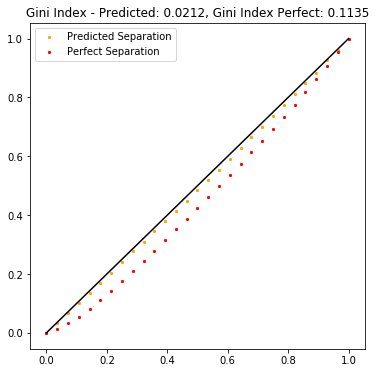

In [151]:
helper.lorenz_curve(y_actual, y_pred)

In [131]:
type(X_train)

pandas.core.frame.DataFrame

In [132]:
svr_gs_flour_post.best_estimator_.predict(X_train)

array([45.34870074, 45.89978746, 45.92272232, 41.98778182, 45.19755615,
       46.24503969, 45.79744341, 46.71753553, 44.72403948, 43.65687219,
       43.58356443, 44.61192889, 45.58388786, 44.26756625, 44.88396699,
       42.24107972, 45.54056201, 42.10003898, 42.17539744, 44.939614  ,
       47.24429573, 43.58894579, 46.22290782, 43.21862582, 42.26430747,
       45.22296373, 46.10013466, 42.17539744, 45.76445105, 41.5782638 ,
       42.23351501, 45.68943859, 52.8557173 , 42.62966195, 46.76438962,
       47.56978601, 44.0175901 , 50.96900323, 45.18238311, 49.90003907])

In [135]:
# %%capture
# create shap explainer object
shap_values = shap.KernelExplainer(svr_gs_flour_post.predict, X_train).shap_values(X_train)
# shap_values(X_train)

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\andre\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C

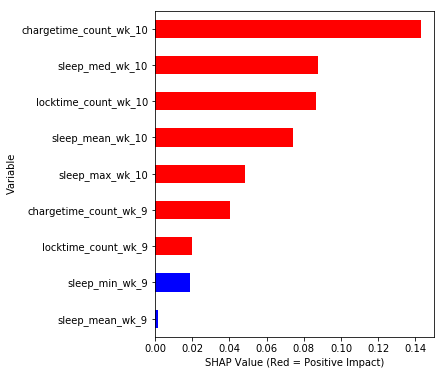

In [146]:
helper.shap_feature_imp(shap_values, X_train, corr_thresh=0.5)

,Actual,Predicted
quantile,,
0,30.333333,41.888695
1,44.000000,42.216664
2,33.000000,43.022166
3,44.500000,43.622909
4,42.333333,44.906287
5,45.000000,45.540676
6,42.500000,45.848615
7,48.666667,46.081922
8,50.333333,46.751242


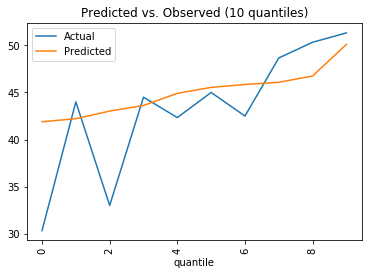

In [154]:
helper.quantile_plot(y_actual, y_pred, quantiles=10)
